In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report
from sklearn import feature_selection
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [18]:
data=pd.read_csv('D:/study/Sem Wise/sem5/AI/Assignments/Assignment4/roo_data.csv')

In [19]:
data.head(10)

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,...,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,...,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,...,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,...,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst
5,88,86,62,79,93,84,69,71,82,11,...,Self help,salary,no,stubborn,Management,work,smart worker,yes,no,Software Systems Engineer
6,93,77,69,79,90,93,73,63,77,6,...,Drama,Work,yes,gentle,Technical,salary,hard worker,yes,yes,Database Developer
7,84,72,88,62,66,63,78,94,60,12,...,Romance,salary,no,stubborn,Technical,salary,smart worker,no,no,Business Intelligence Analyst
8,73,66,66,81,81,69,61,87,90,10,...,Math,Work,no,gentle,Technical,work,hard worker,yes,yes,Business Systems Analyst
9,62,76,85,91,82,69,63,63,81,10,...,Religion-Spirituality,Work,yes,gentle,Management,salary,hard worker,yes,no,CRM Technical Developer


In [20]:
#low = 0 , medium =1, high=2

for i in data:
    if(type(data[i][0])!=type('a')):
        print(i)
        
        low=data[i].quantile(0.33)
        med=data[i].quantile(0.66)
        current=data[i]
        for j in range(len(data)):
            if(current[j]<low):
                current[j]=0
            elif(current[j]>=low and current[j]<med):
                current[j]=1
            else:
                current[j]=2
    
        print(current.value_counts())

Acedamic percentage in Operating Systems
1    6880
2    6841
0    6279
Name: Acedamic percentage in Operating Systems, dtype: int64
percentage in Algorithms
2    6834
1    6825
0    6341
Name: percentage in Algorithms, dtype: int64
Percentage in Programming Concepts
2    6902
1    6811
0    6287
Name: Percentage in Programming Concepts, dtype: int64
Percentage in Software Engineering
2    6973
1    6811
0    6216
Name: Percentage in Software Engineering, dtype: int64
Percentage in Computer Networks
2    7392
1    6343
0    6265
Name: Percentage in Computer Networks, dtype: int64
Percentage in Electronics Subjects
2    6887
1    6809
0    6304
Name: Percentage in Electronics Subjects, dtype: int64
Percentage in Computer Architecture
2    6941
1    6817
0    6242
Name: Percentage in Computer Architecture, dtype: int64
Percentage in Mathematics
2    6858
1    6724
0    6418
Name: Percentage in Mathematics, dtype: int64
Percentage in Communication skills
2    6831
1    6750
0    6419
Name:

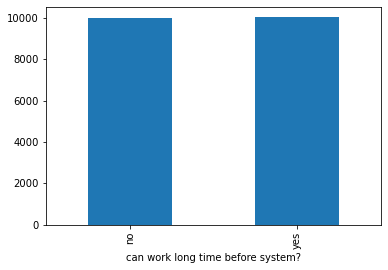

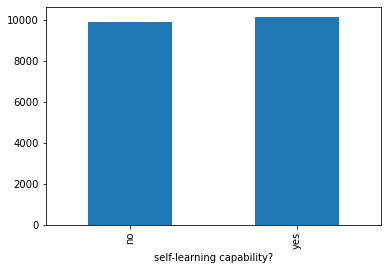

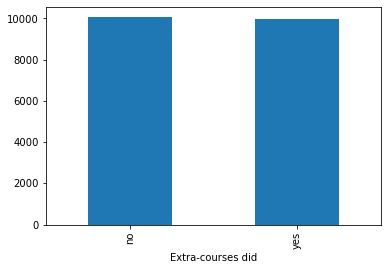

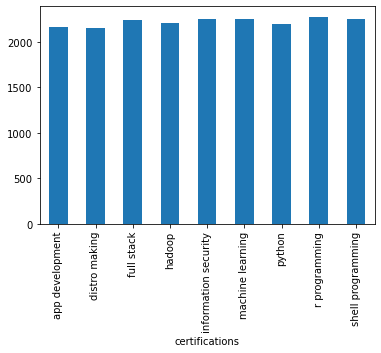

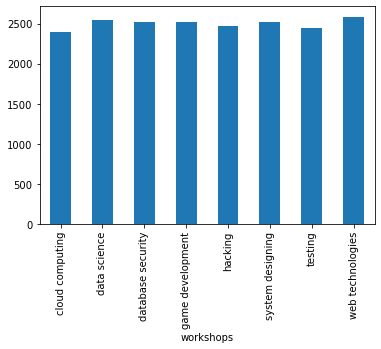

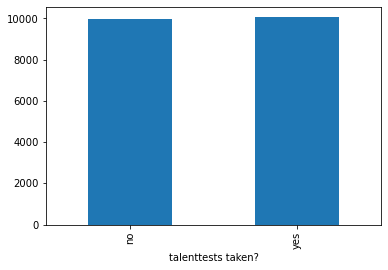

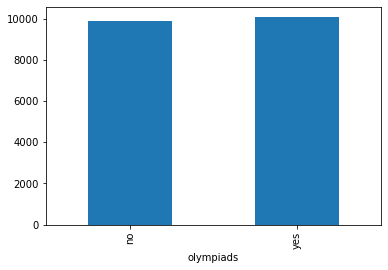

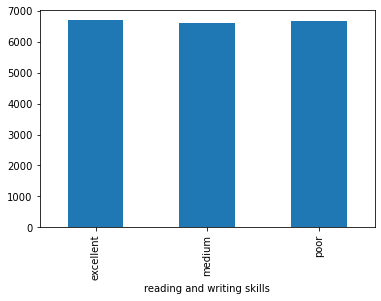

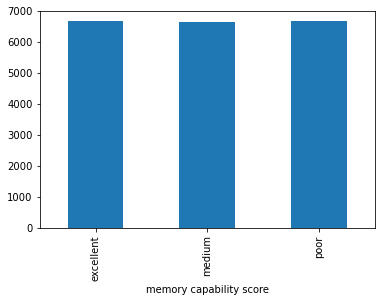

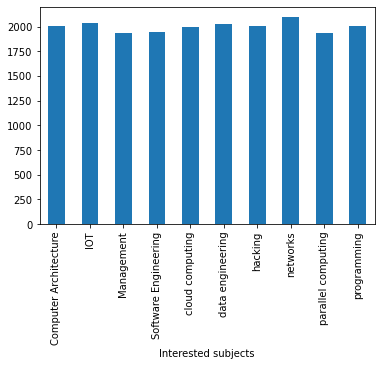

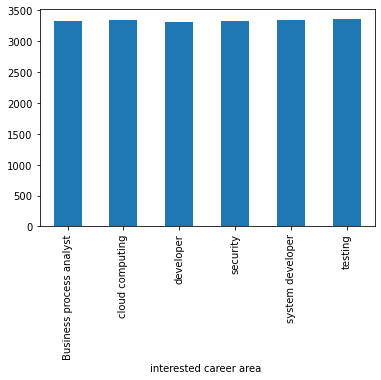

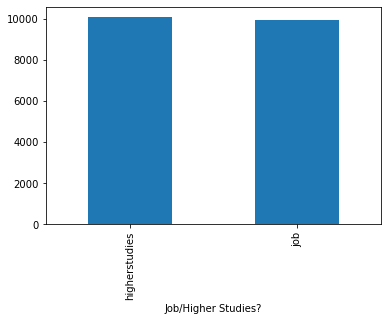

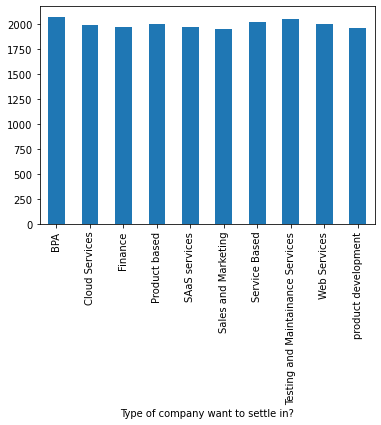

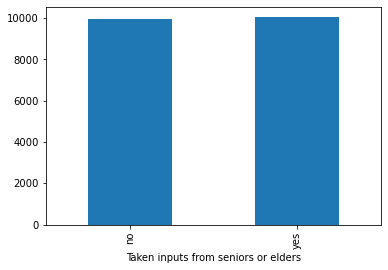

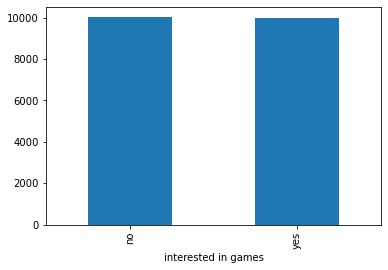

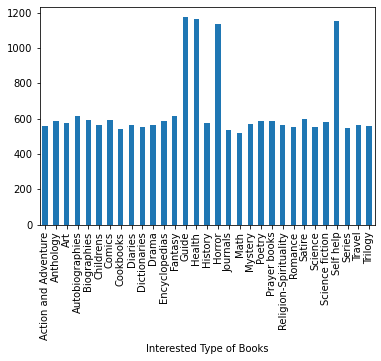

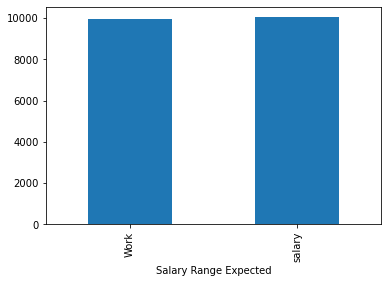

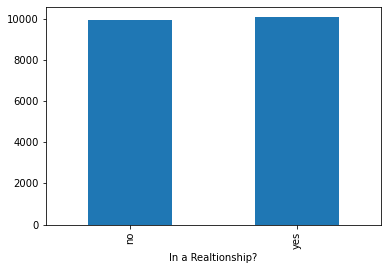

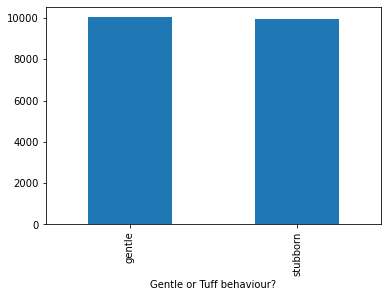

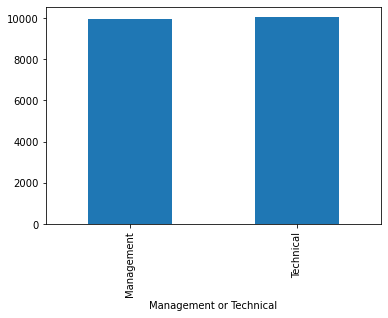

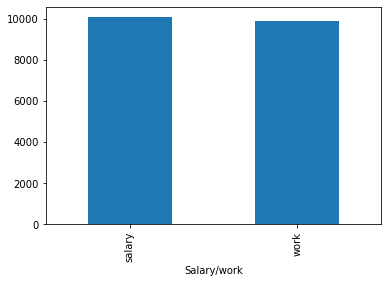

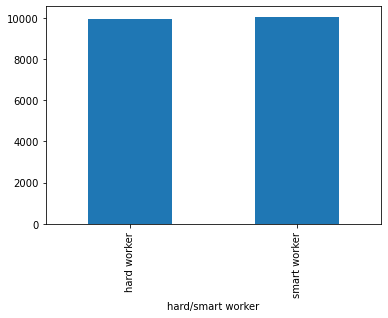

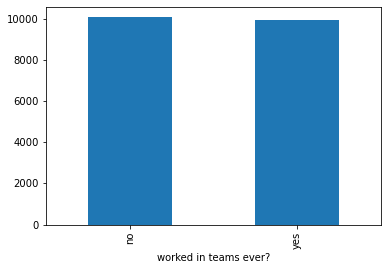

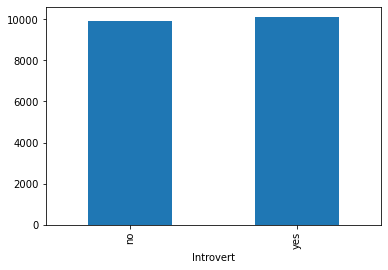

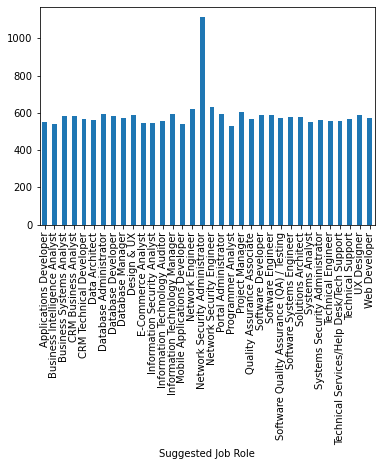

In [5]:
#bar graphs for categorical data
for i in data:
    if(type(data[i][0])==type('abc')):
        data.groupby(i).size().plot(kind='bar')
    plt.show()

In [21]:
columns=[]
for i in data:
    columns.append(i)

all_jobs=set(data[columns[-1]])
print(all_jobs)
print()
print(columns)

{'Data Architect', 'Applications Developer', 'Systems Analyst', 'Business Intelligence Analyst', 'Web Developer', 'Technical Engineer', 'Technical Services/Help Desk/Tech Support', 'Solutions Architect', 'Technical Support', 'CRM Business Analyst', 'Design & UX', 'Network Security Administrator', 'Systems Security Administrator', 'Information Technology Auditor', 'Network Security Engineer', 'Database Administrator', 'CRM Technical Developer', 'Mobile Applications Developer', 'Database Manager', 'Programmer Analyst', 'Software Engineer', 'Portal Administrator', 'UX Designer', 'E-Commerce Analyst', 'Information Security Analyst', 'Quality Assurance Associate', 'Database Developer', 'Information Technology Manager', 'Software Quality Assurance (QA) / Testing', 'Business Systems Analyst', 'Network Engineer', 'Project Manager', 'Software Developer', 'Software Systems Engineer'}

['Acedamic percentage in Operating Systems', 'percentage in Algorithms', 'Percentage in Programming Concepts', '

In [22]:
developer=[]
analyst=[]
network=[]
dataa=[]
tech=[]
ux=[]

for i in all_jobs:
    if('Developer' in i or 'Software' in i or 'Quality' in i):
        developer.append(i)
    elif('Analyst' in i):
        analyst.append(i)
    elif('Network' in i or 'Systems' in i):
        network.append(i)
    elif('Data' in i):
        dataa.append(i)
    elif('Tech' in i or 'Portal' in i):
        tech.append(i)
    else:
        ux.append(i)
print(network)
print(analyst)
print(developer)
print(dataa)
print(tech)
print(ux)
print(len(ux)+len(tech)+len(network)+len(analyst)+len(developer)+len(dataa))
print(len(all_jobs))

['Network Security Administrator', 'Systems Security Administrator', 'Network Security Engineer', 'Network Engineer']
['Systems Analyst', 'Business Intelligence Analyst', 'CRM Business Analyst', 'Programmer Analyst', 'E-Commerce Analyst', 'Information Security Analyst', 'Business Systems Analyst']
['Applications Developer', 'Web Developer', 'CRM Technical Developer', 'Mobile Applications Developer', 'Software Engineer', 'Quality Assurance Associate', 'Database Developer', 'Software Quality Assurance (QA) / Testing', 'Software Developer', 'Software Systems Engineer']
['Data Architect', 'Database Administrator', 'Database Manager']
['Technical Engineer', 'Technical Services/Help Desk/Tech Support', 'Technical Support', 'Information Technology Auditor', 'Portal Administrator', 'Information Technology Manager']
['Solutions Architect', 'Design & UX', 'UX Designer', 'Project Manager']
34
34


In [23]:
#pre processing, label encoding for string types
for i in columns:
    if(i==columns[-1]):
        data['new_'+i]=np.zeros(len(data))
        for j in range(len(data)):
            if(data[i][j] in network):
                data['new_'+i][j]=1
            elif(data[i][j] in tech):
                data['new_'+i][j]=2
            if(data[i][j] in analyst):
                data['new_'+i][j]=3
            if(data[i][j] in developer):
                data['new_'+i][j]=4
            if(data[i][j] in ux):
                data['new_'+i][j]=5
            if(data[i][j] in dataa):
                data['new_'+i][j]=6
        data=data.drop(i,axis=1)
            
    elif(type(data[i][0])!=type(np.int64(0))):
        print(i)
        count=0
        dictionary={}
        for j in range(len(data)):
            if(data[i][j] not in dictionary):
                dictionary[data[i][j]]=count
                count+=1
        
        data['new_'+i]=np.zeros(len(data))
        for j in range(len(data)):
            data['new_'+i][j]=dictionary[data[i][j]]
        
        data=data.drop(i,axis=1)
        print(count)

can work long time before system?
2
self-learning capability?
2
Extra-courses did
2
certifications
9
workshops
8
talenttests taken?
2
olympiads
2
reading and writing skills
3
memory capability score
3
Interested subjects
10
interested career area 
6
Job/Higher Studies?
2
Type of company want to settle in?
10
Taken inputs from seniors or elders
2
interested in games
2
Interested Type of Books
31
Salary Range Expected
2
In a Realtionship?
2
Gentle or Tuff behaviour?
2
Management or Technical
2
Salary/work
2
hard/smart worker
2
worked in teams ever?
2
Introvert
2


In [24]:
data.head(10)

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,new_Interested Type of Books,new_Salary Range Expected,new_In a Realtionship?,new_Gentle or Tuff behaviour?,new_Management or Technical,new_Salary/work,new_hard/smart worker,new_worked in teams ever?,new_Introvert,new_Suggested Job Role
0,0,0,1,2,2,2,2,2,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,1,0,1,0,1,0,1,2,2,2,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0
2,1,2,2,2,0,1,1,1,2,2,...,2.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0
3,1,2,0,2,2,1,0,2,0,1,...,3.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
4,2,0,2,0,1,2,1,1,1,0,...,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0
5,2,2,0,1,2,2,0,1,1,2,...,5.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0
6,2,1,0,1,2,2,1,0,1,1,...,6.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0
7,2,1,2,0,0,0,1,2,0,2,...,3.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,3.0
8,1,0,0,1,1,0,0,2,2,2,...,7.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,3.0
9,0,1,2,2,2,0,0,0,1,2,...,8.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0


In [25]:
labels=data['new_'+columns[-1]]
data=data.drop('new_'+columns[-1],axis=1)

scaler=StandardScaler()
data=scaler.fit_transform(data,labels)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(data,labels, test_size=0.2)

In [12]:
from sklearn.decomposition import PCA
clf = MLPClassifier(learning_rate_init=0.01,hidden_layer_sizes=(100,50,50),max_iter=100,verbose=True,n_iter_no_change=20)

for i in range(3,15):

    pca = PCA(n_components=i)
    pca.fit(data)
    
    cur_data=pca.transform(x_train)
    cur_test_data=pca.transform(x_test)
    
    clf.fit(cur_data,y_train)
    
    print(clf.best_loss_)
    pred=clf.predict(cur_test_data)
    print(classification_report(pred,y_test))

Iteration 1, loss = 1.73002178
Iteration 2, loss = 1.72491045
Iteration 3, loss = 1.72359823
Iteration 4, loss = 1.72368283
Iteration 5, loss = 1.72338032
Iteration 6, loss = 1.72330508
Iteration 7, loss = 1.72353913
Iteration 8, loss = 1.72359019
Iteration 9, loss = 1.72304284
Iteration 10, loss = 1.72302644
Iteration 11, loss = 1.72346133
Iteration 12, loss = 1.72335259
Iteration 13, loss = 1.72331467
Iteration 14, loss = 1.72316526
Iteration 15, loss = 1.72306361
Iteration 16, loss = 1.72290402
Iteration 17, loss = 1.72287780
Iteration 18, loss = 1.72314865
Iteration 19, loss = 1.72283881
Iteration 20, loss = 1.72277260
Iteration 21, loss = 1.72277421
Iteration 22, loss = 1.72283874
Iteration 23, loss = 1.72268156
Iteration 24, loss = 1.72270395
Iteration 25, loss = 1.72283861
Iteration 26, loss = 1.72293535
Iteration 27, loss = 1.72228494
Iteration 28, loss = 1.72265594
Iteration 29, loss = 1.72239942
Iteration 30, loss = 1.72270408
Iteration 31, loss = 1.72266919
Iteration 32, los

In [29]:
pca = PCA(n_components=11)
pca.fit(data)

cur_data=pca.transform(x_train)
cur_test_data=pca.transform(x_test)

In [30]:
#trying various train test split

test_sizes=[0.1,0.2,0.3,0.4]
for test in test_sizes:
    x_train, x_test, y_train, y_test = train_test_split(data,labels, test_size=0.2)
    clf = MLPClassifier(learning_rate_init=0.01,hidden_layer_sizes=(100,50,50),max_iter=100,verbose=False,n_iter_no_change=20)
    clf.fit(cur_data,y_train)
    print(clf.best_loss_)
    pred=clf.predict(cur_test_data)
    print(classification_report(pred,y_test))

1.4936101282372836
              precision    recall  f1-score   support

         1.0       0.15      0.15      0.15       585
         2.0       0.10      0.15      0.12       459
         3.0       0.12      0.18      0.14       501
         4.0       0.56      0.29      0.38      2251
         5.0       0.02      0.10      0.04       121
         6.0       0.03      0.13      0.05        83

    accuracy                           0.23      4000
   macro avg       0.17      0.17      0.15      4000
weighted avg       0.37      0.23      0.27      4000

1.482400544096195
              precision    recall  f1-score   support

         1.0       0.02      0.12      0.03       101
         2.0       0.05      0.15      0.07       211
         3.0       0.09      0.19      0.12       371
         4.0       0.78      0.28      0.42      3130
         5.0       0.04      0.18      0.07       108
         6.0       0.02      0.08      0.03        79

    accuracy                           0

In [31]:
multilabel_confusion_matrix(y_test, pred)

array([[[3284,  133],
        [ 560,   23]],

       [[3026,  276],
        [ 637,   61]],

       [[3058,  171],
        [ 727,   44]],

       [[ 963, 1896],
        [ 380,  761]],

       [[3033,  486],
        [ 403,   78]],

       [[3609,   65],
        [ 320,    6]]], dtype=int64)

In [17]:
data=pd.read_csv('D:/study/Sem Wise/sem5/AI/Assignments/Assignment4/roo_data.csv')

for i in data:
    if(type(data[i][0])!=type('a')):
        print(i)
        
        low=data[i].quantile(0.33)
        med=data[i].quantile(0.66)
        current=data[i]
        for j in range(len(data)):
            if(current[j]<low):
                current[j]=0
            elif(current[j]>=low and current[j]<med):
                current[j]=1
            else:
                current[j]=2
        
for i in columns:
    if(type(data[i][0])!=type(np.int64(0))):
        print(i)
        count=0
        dictionary={}
        for j in range(len(data)):
            if(data[i][j] not in dictionary):
                dictionary[data[i][j]]=count
                count+=1
        
        data['new_'+i]=np.zeros(len(data))
        for j in range(len(data)):
            data['new_'+i][j]=dictionary[data[i][j]]
        
        data=data.drop(i,axis=1)
        print(count)
        
labels=data['new_'+columns[-1]]
data=data.drop('new_'+columns[-1],axis=1)



Acedamic percentage in Operating Systems
percentage in Algorithms
Percentage in Programming Concepts
Percentage in Software Engineering
Percentage in Computer Networks
Percentage in Electronics Subjects
Percentage in Computer Architecture
Percentage in Mathematics
Percentage in Communication skills
Hours working per day
Logical quotient rating
hackathons
coding skills rating
public speaking points
can work long time before system?
2
self-learning capability?
2
Extra-courses did
2
certifications
9
workshops
8
talenttests taken?
2
olympiads
2
reading and writing skills
3
memory capability score
3
Interested subjects
10
interested career area 
6
Job/Higher Studies?
2
Type of company want to settle in?
10
Taken inputs from seniors or elders
2
interested in games
2
Interested Type of Books
31
Salary Range Expected
2
In a Realtionship?
2
Gentle or Tuff behaviour?
2
Management or Technical
2
Salary/work
2
hard/smart worker
2
worked in teams ever?
2
Introvert
2
Suggested Job Role
34


In [22]:
from sklearn.cluster import KMeans
clf = MLPClassifier(learning_rate_init=0.01,hidden_layer_sizes=(100,50,50),max_iter=100,verbose=True,n_iter_no_change=20)

scaler=StandardScaler()
scaler.fit(data,labels)
curr_data=scaler.fit_transform(data)

In [31]:
k_values=[]
accuracy=[]
for i in range(6,10):
    kmeans = KMeans(n_clusters=i).fit(curr_data)
    label=kmeans.labels_
    print("Value of ")
    x_train, x_test, y_train, y_test = train_test_split(curr_data,label, test_size=0.2)
    clf = MLPClassifier(hidden_layer_sizes=(50),max_iter=5,verbose=False,learning_rate_init=0.01).fit(x_train, y_train)
    
    print(clf.best_loss_)
    pred=clf.predict(x_test)
    print(classification_report(pred,y_test))
    
    sc=clf.score(x_test,y_test)
    k_values.append(i)
    accuracy.append(sc)

Iteration 1, loss = 0.43891898
Iteration 2, loss = 0.00733976
Iteration 3, loss = 0.00288296
Iteration 4, loss = 0.00162115
Iteration 5, loss = 0.00105767
Iteration 6, loss = 0.00075446
Iteration 7, loss = 0.00057077
Iteration 8, loss = 0.00045037
Iteration 9, loss = 0.00036707
Iteration 10, loss = 0.00030681
0.0003068086433704329
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       563
           1       1.00      1.00      1.00       738
           2       1.00      1.00      1.00       699
           3       1.00      1.00      1.00       712
           4       1.00      1.00      1.00       725
           5       1.00      1.00      1.00       563

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

Iteration 1, loss = 0.58948733
Iteration 2, loss = 0.01111296
Iteration 3, loss = 0.00411710
Iteration 4, loss = 0.00227148


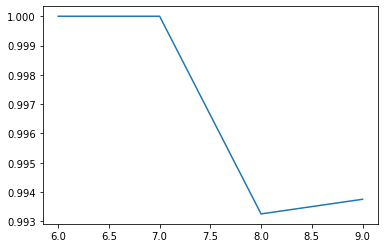

In [32]:
plt.plot(k_values,accuracy)